In [1]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#open the fie using panda library
#code for uploading excel sheet in the list

file_errors_location = '/home/kasat/startups.csv'
df = pd.read_csv(file_errors_location)

#print(df)

In [3]:
#now we want to handle the missing value we just replace it by its column mean
#dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN

df = df.replace(0, np.NaN)

# fill missing values with mean column values

df.fillna(df.mean(), inplace=True)

# count the number of NaN values in each column
#print(df.isnull().sum())
#print(df)

In [4]:
#how to find the datatype of data set in python

df.dtypes
df2 = df.loc[:,'State']

#print(df2)

In [5]:
#one hot encoding technique

one_hot= pd.get_dummies(df2)

#print(one_hot)
#apend both the data set df and df2 
#new_data = pd.merge([df,df2]

new_data= pd.concat([df,one_hot],axis=1)

#delete the state data

del new_data['State']

#print(new_data)

In [6]:
#now convert this new_data into array x,theta etc.

x = np.array(new_data)

#add 1 in x matrix

x = np.insert(x, 0, values=1, axis=1) # Insert values before column 0
for i in range(1, 8):
    x[:,i] = (x[:,i] - np.mean( x[:,i])) / (np.max(x[:,i] - np.min(x[:,i])))

#print(x)

y = np.array(x)
y = y[:,[4]]

x = np.delete(x, 4, 1)
x = np.delete(x,6,1)

#print(y.shape)
print(x.shape)
#print(x)

(50, 6)


# Gradient Descent of Linear Regression

[[-7.68385355e-17  5.95463246e-01  4.48280829e-02  2.35659638e-01
  -2.77221022e-02  4.16943156e-03]]
cost for alpha = 0.005
0.00506287523804993
cost for alpha = 0.01
0.005001483621051977


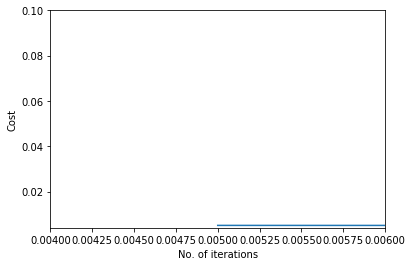

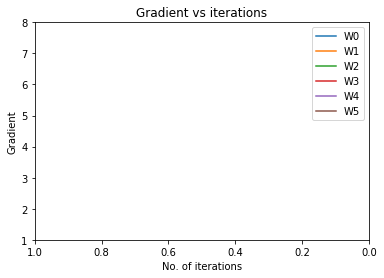

In [7]:
#apply the gradient decent in the x and y
alpha = 0.005
alpha_1 = 0.01
theta = np.zeros([1,6])
m = 50
iters = 15000

def computeCost(x,y,theta):
    sum1 = (y-(np.dot(x,theta.T)))**2
    return np.sum(sum1)/(2*m)

def gradientDescent(x,y,theta,iters,alpha):
    cost = np.zeros(iters)
    grad_list = []
    for i in range(iters):
        grad = 1/m*(np.array(np.sum(x *((np.dot(x,theta.T)) - y),axis = 0)))
        grad_list.append(grad)
        theta = theta - (alpha) * grad
        cost[i] = computeCost(x, y, theta)
    return theta,cost,grad_list

g,cost,grad_list = gradientDescent(x,y,theta,iters,alpha)
g1,cost1,grad_list1 = gradientDescent(x,y,theta,iters,alpha_1)
print(g)
grad_list = np.array(grad_list)

print("cost for alpha = 0.005")
print(cost[-1])
print("cost for alpha = 0.01")
print(cost1[-1])

plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot([alpha,alpha_1],[cost[-1],cost1[-1]])
plt.axis([0.0040, 0.0060, 0.004, 0.1])
plt.show()


x = [alpha,alpha_1] 
# corresponding y axis values 
y = [cost[-1],cost1[-1]] 
plt.ylim(1,8) 
plt.xlim(1,0.)   
# plotting the points  
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 

plt.title('Gradient vs iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Gradient')
plt.plot(grad_list[:,0], label="W0")
plt.plot(grad_list[:,1], label="W1")
plt.plot(grad_list[:,2], label="W2")
plt.plot(grad_list[:,3], label="W3")
plt.plot(grad_list[:,4], label="W4")
plt.plot(grad_list[:,5], label="W5")
plt.legend()
plt.show()

In [8]:
h1 = np.matmul(x,g.T)
plt.plot(y,'r')
plt.plot(h1,'g')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 2)

In [ ]:
grad_list[:,2]

# RIGID REGRESSION

In [ ]:
alpha = 0.005
alpha_1 = 0.01
lambda_1 = 0.01
iters = 4000
theta = np.zeros([1,6])
m = 50

def computecost(x,y,theta,lambda_1):
    sum1 = np.power((np.dot(x,theta.T) - y),2)
    sum2 = np.dot(theta,theta.T)
    return np.sum(sum1)/(2 * m) + (lambda_1 * sum2)/(2*m)

def gradientDescent(x,y,theta,iters,alpha,lambda_1):
    cost = np.zeros(iters)
    grad_list = []
    for i in range(iters):
        s_theta = np.sum(theta)
        q = np.sum(np.dot((np.dot(x,theta.T) - y).T,x),axis=0)
        grad = (q + lambda_1 * s_theta)
        grad_list.append(grad)
        #q = np.dot((np.dot(x,theta.T)-y).T,x)
        #print(q+lambda_1*s_theta)
        theta = theta - (alpha/m) * (q + lambda_1 * s_theta)
        #theta = theta - (alpha /m) * (np.sum(x *((np.dot(x,theta.T)) - y),axis = 0) + (lambda_1 * s_theta))
        cost[i] = computecost(x,y,theta,lambda_1)
        
    return theta,cost

g,cost = gradientDescent(x,y,theta,iters,alpha_1,lambda_1)
#g1,cost1 = gradientDescent(x,y,theta,iters,alpha_1,lambda_1)
      
print("cost for alpha = 0.005")
print(cost[-1])
print("cost for alpha = 0.01")
#print(cost1[-1])

plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost)
plt.figure()
#plt.xlabel('No. of iterations')
#plt.ylabel('Cost')
#plt.plot(cost1)

plt.title('Gradient vs iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Gradient')
plt.plot(grad_list[:,0], label="W0")
plt.plot(grad_list[:,1], label="W1")
plt.plot(grad_list[:,2], label="W2")
plt.plot(grad_list[:,3], label="W3")
plt.plot(grad_list[:,4], label="W4")
plt.plot(grad_list[:,5], label="W5")
plt.legend()
plt.show()
    

# LASSO REGRESSION

In [ ]:
alpha=0.005
alpha_1 = 0.01
iters=250
lambda1=.05
theta = np.zeros([1,6])

def computeCost(x,y,theta):
    sum1 = np.power(((np.dot(x,theta.T))-y),2)
    sum2 = np.abs(theta)
    return (np.sum(sum1)+(lambda1*(np.sum(sum2))))/(2*m)

def gradientDescent(x,y,theta,iters,alpha,lambda1):
    cost = np.zeros(iters)
    grad_list = []
    for i in range(iters):
        grad = ( np.sum(x * ((np.matmul(x,theta.T)) - y),axis=0)+(2*lambda1*np.sum(np.sign(theta))))
        grad_list.append(grad)
        theta = theta - (alpha/2) * grad
        cost[i] = computeCost(x, y, theta)
    
    return theta,cost

g,cost = gradientDescent(x,y,theta,iters,alpha_1,lambda1)
#g1,cost1 = gradientDescent(x,y,theta,iters,alpha_1,lambda1)

#print(g)
#print(cost)

print("cost for alpha = 0.005")
print(cost[-1])
print("cost for alpha = 0.01")
#print(cost1[-1])

plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost)
plt.figure()
#plt.xlabel('No. of iterations')
#plt.ylabel('Cost1')
# plt.plot(cost1)

plt.title('Gradient vs iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Gradient')
plt.plot(grad_list[:,0], label="W0")
plt.plot(grad_list[:,1], label="W1")
plt.plot(grad_list[:,2], label="W2")
plt.plot(grad_list[:,3], label="W3")
plt.plot(grad_list[:,4], label="W4")
plt.plot(grad_list[:,5], label="W5")
plt.legend()
plt.show()